<a href="https://colab.research.google.com/github/kridtapon/Rebalancing-Top-1-Stock-S-P500/blob/main/Rebalancing_Top_1_Stock_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


# Fetch the S&P 500 ticker list from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(wiki_url)
sp500_df = sp500_table[0]  # Get the first table on the page
sp500_tickers = sp500_df['Symbol'].tolist()

# Clean the tickers (remove any invalid ones)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Download adjusted closing prices from Yahoo Finance
start_date = '1999-01-01'
end_date = '2024-01-01'

stock_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate annual returns for each stock
stock_data = stock_data.asfreq('B')  # Set frequency to business days
annual_returns = stock_data.resample('Y').last().pct_change()

# Rank stocks based on annual returns each year
ranked_stocks = annual_returns.rank(axis=1, ascending=False)

# Select top 1% of stocks each year
top_1_percent_stocks = ranked_stocks <= ranked_stocks.shape[1] * 0.01

# Get the tickers for the top 5% of stocks each year
top_1_percent_tickers = top_1_percent_stocks.apply(lambda x: list(stock_data.columns[x]), axis=1)

top_1_percent_tickers

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['SOLV', 'GEV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1999-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 915166800, endDate = 1704085200")')
<ipython-input-1-48e1b017acc2>:23: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = stock_data.resample('Y').last().pct_change()
<ipython-input-1-48e1b017acc2>:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  annual_returns = stock_data.resample('Y').last().pct_change()


,0
Date,
1999-12-31,[]
2000-12-31,"[COR, DGX, EG, LH, VRTX]"
2001-12-31,"[BKNG, KMX, NVDA, TSCO, TYL]"
2002-12-31,"[AMZN, BSX, CTSH, ODFL, TSCO]"
2003-12-31,"[AKAM, ALGN, AXON, DECK, SBAC]"
2004-12-31,"[AAPL, ADSK, AXON, CME, MNST]"
2005-12-31,"[HOLX, ISRG, MNST, NDAQ, VRTX]"
2006-12-31,"[AKAM, ALGN, DECK, ICE, LVS]"
2007-12-31,"[BKNG, CF, FSLR, ISRG, MOS]"


In [2]:
# Create a DataFrame to store the next year's returns for top 1% stocks
next_year_returns = pd.DataFrame(index=annual_returns.index, columns=['Top 1% Avg Return'])

# Iterate through each year to calculate the next year's return
for year in range(annual_returns.shape[0] - 1):
    print(f"Year: {annual_returns.index[year]}")  # Print current year

    # Get the top 1% tickers for the current year
    current_year_tickers = stock_data.columns[top_1_percent_stocks.iloc[year]]
    print(f"Top 1% Tickers for {annual_returns.index[year]}: {current_year_tickers.tolist()}")  # Print tickers

    # Get the next year's returns for these tickers
    next_year = annual_returns.iloc[year + 1]
    returns_for_selected = next_year[current_year_tickers].dropna()  # Remove NaN returns
    print(f"Next Year's Returns for Selected Tickers ({annual_returns.index[year + 1]}):")
    print(returns_for_selected)

    # Calculate the average return for the next year
    if not returns_for_selected.empty:
        average_return = returns_for_selected.mean()
        next_year_returns.iloc[year + 1] = average_return
        print(f"Average Return for {annual_returns.index[year + 1]}: {average_return}\n")
    else:
        print(f"No valid returns for {annual_returns.index[year + 1]}\n")

# Drop rows with no valid data
next_year_returns.dropna(inplace=True)

# Print the final result
print("Next Year's Returns DataFrame:")
print(next_year_returns)


Year: 1999-12-31 00:00:00
Top 1% Tickers for 1999-12-31 00:00:00: []
Next Year's Returns for Selected Tickers (2000-12-31 00:00:00):
Series([], Name: 2000-12-31 00:00:00, dtype: float64)
No valid returns for 2000-12-31 00:00:00

Year: 2000-12-31 00:00:00
Top 1% Tickers for 2000-12-31 00:00:00: ['COR', 'DGX', 'EG', 'LH', 'VRTX']
Next Year's Returns for Selected Tickers (2001-12-31 00:00:00):
Ticker
COR     0.258987
DGX     0.010000
EG     -0.008743
LH     -0.081250
VRTX   -0.656084
Name: 2001-12-31 00:00:00, dtype: float64
Average Return for 2001-12-31 00:00:00: -0.09541800039540138

Year: 2001-12-31 00:00:00
Top 1% Tickers for 2001-12-31 00:00:00: ['BKNG', 'KMX', 'NVDA', 'TSCO', 'TYL']
Next Year's Returns for Selected Tickers (2002-12-31 00:00:00):
Ticker
BKNG   -0.725086
KMX    -0.213720
NVDA   -0.827952
TSCO    1.206573
TYL    -0.083517
Name: 2002-12-31 00:00:00, dtype: float64
Average Return for 2002-12-31 00:00:00: -0.12874023361574882

Year: 2002-12-31 00:00:00
Top 1% Tickers for 

In [3]:
# Create a DataFrame to store the next year's returns for top 5% stocks
next_year_returns = pd.DataFrame(index=annual_returns.index, columns=['Top 1% Avg Return'])

# Iterate through each year to calculate the next year's return
for year in range(annual_returns.shape[0] - 1):
    # Get the top 1% tickers for the current year
    current_year_tickers = stock_data.columns[top_1_percent_stocks.iloc[year]]

    # Get the next year's returns for these tickers
    next_year = annual_returns.iloc[year + 1]
    returns_for_selected = next_year[current_year_tickers].dropna()  # Remove NaN returns

    # Calculate the average return for the next year
    if not returns_for_selected.empty:
        next_year_returns.iloc[year + 1] = returns_for_selected.mean()

# Drop rows with no valid data
next_year_returns.dropna(inplace=True)

# Print the result
print(next_year_returns)


           Top 1% Avg Return
Date                        
2001-12-31         -0.095418
2002-12-31          -0.12874
2003-12-31          1.056844
2004-12-31          1.246654
2005-12-31          0.906429
2006-12-31          0.200323
2007-12-31          0.473509
2008-12-31         -0.526664
2009-12-31          0.120292
2010-12-31         -0.024475
2011-12-31          -0.09229
2012-12-31          0.287184
2013-12-31          0.301622
2014-12-31          0.292153
2015-12-31          0.046998
2016-12-31          0.564062
2017-12-31          0.229233
2018-12-31          0.226641
2019-12-31          1.532742
2020-12-31          1.786122
2021-12-31          0.497078
2022-12-31         -0.034481
2023-12-31          0.412797


In [4]:
next_year = next_year_returns.iloc[3:]

In [5]:
next_year

,Top 1% Avg Return
Date,
2004-12-31,1.246654
2005-12-31,0.906429
2006-12-31,0.200323
2007-12-31,0.473509
2008-12-31,-0.526664
2009-12-31,0.120292
2010-12-31,-0.024475
2011-12-31,-0.09229
2012-12-31,0.287184


<ipython-input-6-03cf37536c7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_year['Top 1% Avg Return'] = pd.to_numeric(next_year['Top 1% Avg Return'], errors='coerce')


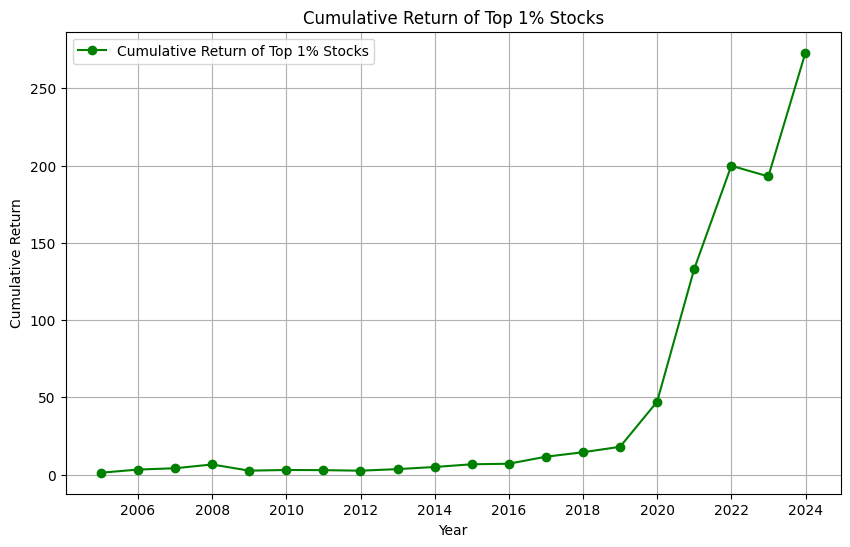

In [6]:
import matplotlib.pyplot as plt

# Convert the 'Top 5% Avg Return' column to a numeric type
next_year['Top 1% Avg Return'] = pd.to_numeric(next_year['Top 1% Avg Return'], errors='coerce')

# Calculate cumulative return
cumulative_return = (1 + next_year['Top 1% Avg Return']).cumprod() - 1

# Plot cumulative return
plt.figure(figsize=(10, 6))
plt.plot(cumulative_return, label="Cumulative Return of Top 1% Stocks", marker='o', linestyle='-', color='g')
plt.title("Cumulative Return of Top 1% Stocks")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['SOLV', 'GEV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1999-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 915166800, endDate = 1704085200")')
<ipython-input-7-273567ddfa9b>:23: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = stock_data.resample('Y').last().pct_change()
<ipython-input-7-273567ddfa9b>:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  annual_returns = stock_data.resample('Y').last().pct_change()


Date
1999-12-31         NaN
2000-12-31    0.275512
2001-12-31    0.109926
2002-12-31   -0.096151
2003-12-31    0.569116
2004-12-31    0.269495
2005-12-31    0.159914
2006-12-31    0.212065
2007-12-31    0.158729
2008-12-31   -0.336302
2009-12-31    0.437288
2010-12-31    0.261729
2011-12-31    0.055424
2012-12-31    0.223192
2013-12-31    0.416817
2014-12-31    0.189786
2015-12-31    0.044395
2016-12-31    0.181153
2017-12-31    0.268893
2018-12-31   -0.028323
2019-12-31    0.352432
2020-12-31    0.190633
2021-12-31    0.308773
2022-12-31   -0.082141
2023-12-31    0.202202
Freq: YE-DEC, dtype: float64


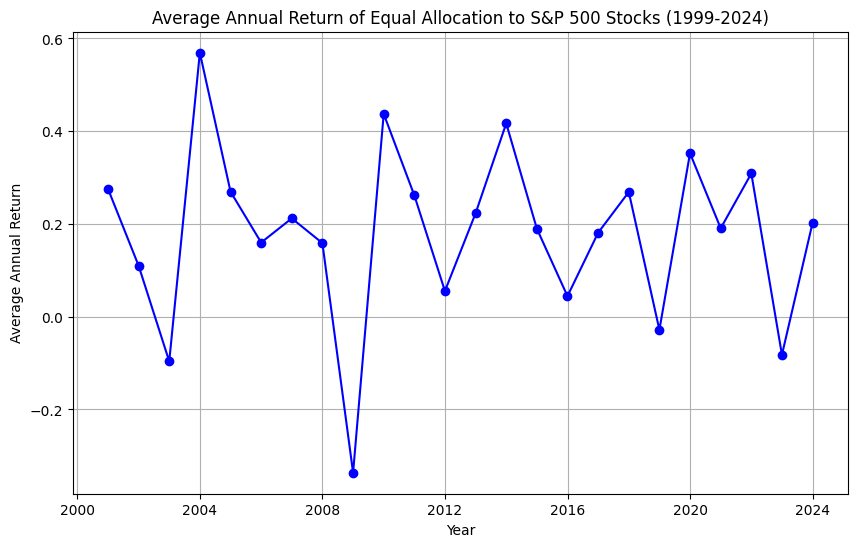

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch the S&P 500 ticker list from Wikipedia
wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
sp500_table = pd.read_html(wiki_url)
sp500_df = sp500_table[0]  # Get the first table on the page
sp500_tickers = sp500_df['Symbol'].tolist()

# Clean the tickers (remove any invalid ones)
sp500_tickers = [ticker.replace('.', '-') for ticker in sp500_tickers]

# Download adjusted closing prices from Yahoo Finance
start_date = '1999-01-01'
end_date = '2024-01-01'

stock_data = yf.download(sp500_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate annual returns for each stock
stock_data = stock_data.asfreq('B')  # Set frequency to business days
annual_returns = stock_data.resample('Y').last().pct_change()

# Calculate the average return for the S&P 500 stocks each year
average_annual_return = annual_returns.mean(axis=1)

# Display the average annual return
print(average_annual_return)

# Plot the average annual return over time
plt.figure(figsize=(10,6))
plt.plot(average_annual_return.index, average_annual_return, marker='o', linestyle='-', color='b')
plt.title('Average Annual Return of Equal Allocation to S&P 500 Stocks (1999-2024)')
plt.xlabel('Year')
plt.ylabel('Average Annual Return')
plt.grid(True)
plt.show()


In [8]:
cut_year = average_annual_return.iloc[5:]
cut_year

,0
Date,
2004-12-31,0.269495
2005-12-31,0.159914
2006-12-31,0.212065
2007-12-31,0.158729
2008-12-31,-0.336302
2009-12-31,0.437288
2010-12-31,0.261729
2011-12-31,0.055424
2012-12-31,0.223192


Date
2004-12-31     0.269495
2005-12-31     0.472504
2006-12-31     0.784771
2007-12-31     1.068065
2008-12-31     0.372571
2009-12-31     0.972779
2010-12-31     1.489112
2011-12-31     1.627068
2012-12-31     2.213408
2013-12-31     3.552811
2014-12-31     4.416871
2015-12-31     4.657355
2016-12-31     5.682205
2017-12-31     7.479004
2018-12-31     7.238855
2019-12-31    10.142495
2020-12-31    12.266624
2021-12-31    16.363005
2022-12-31    14.936786
2023-12-31    18.159241
Freq: YE-DEC, dtype: float64


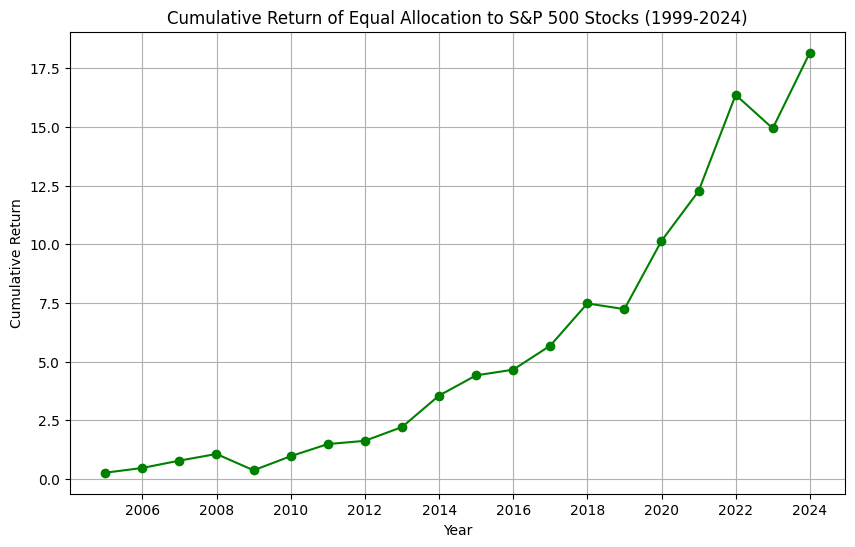

In [10]:
# Calculate the cumulative return
cumulative_return = (1 + cut_year).cumprod() - 1

# Display the cumulative return
print(cumulative_return)

# Plot the cumulative return over time
plt.figure(figsize=(10,6))
plt.plot(cumulative_return.index, cumulative_return, marker='o', linestyle='-', color='g')
plt.title('Cumulative Return of Equal Allocation to S&P 500 Stocks (1999-2024)')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()